## 📚 Disciplina: Tópicos Especiais II (C318) 

### Projeto: 
Locus - Housing Pricing Calculator

### Professor: 
Ricardo Augusto

### Alunos: 
* Alexander Augusto Silva Fernandes
* Aguinaldo de Souza Júnior
* Vanessa Swerts Esteves

## 🤖 Formulação e definição do problema de Machine Learning (ML)

1. Enquadramento do problema: Aprendizagem Supervisionada;
2. Trata-se de um problema de regressão múltipla:
    * Variável de entrada: Características de um imóvel;
    * variável de saída: preço aproximado do imóvel).
3. No futuro, poderá ter mais dados entrando na aplicação, ou seja, seria necessário o ajuste dos dados pelo treinamento online; 
4. A quantidade de dados pode ser acomodada na memória (batch learning).

## 🏗️ Estrutura do Projeto de ML

### 1. Estrutura do projeto   
* Importação das bibliotecas utilizadas
* Importação da base de dados
* Manipulações iniciais nos dados

### 2. Métodos de Amostragem (Sampling)
* Métodos de Amostragem (Sampling Methods)
* Método de amostragem baseado em identificadores únicos do dataset
* Método de Amostragem Aleatória Simples (Sklearn)
* Método de Amostragem Aleatória baseado em Estratificação
* Proporção da Amostragem e Representavidade

### 3. Análise Exploratória de Dados
* Visualizações dos dados
* Investigando correlações

### 4. Preparação dos Dados para Modelagem 
* Limpeza dos dados
* Manipulando features categóricas
* Transformações Customizadas
* Feature Scaling - Pipeline de transformação

### Modelagem
* Mini-Exemplo de Treinamento do modelo
* Avaliação de Desempenho - Evaluation

## 1. Estrutura do Projeto

## 1.1. Importação das bibliotecas utilizadas

In [1]:
# Bibliotecas utilizadas no projeto

import os
import tarfile
import urllib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from zlib import crc32
import klib

import functions

## 1.2. Importação da base de dados

Este dataset foi criado coletando dados do site de imóveis [Vivareal](https://www.vivareal.com.br/).

1. id: Identificador único do imóvel;
2. type: Tipo de imóvel (Apartamento, Casa, Casa de condomínio, etc);
3. location: Endereço completo do imóvel;
4. area: Area total do imóvel (m²);
5. bedroom: Quantidade de quartos no imóvel;
6. bathroom: Quantidade de banheiros do imóvel;
7. garage: Quantidade de vagas na garagem;
8. condominium: Valor do condomínio pago no imóvel;
9. price: Preço de venda do imóvel (R$);
10. latitude: Medida do quão distante do norte está o imóvel (quanto maior, mais ao norte o imóvel está);
11. longitude: Medida do quão distante do oeste está o imóvel (quanto maior, mais a oeste o imóvel está).

In [13]:
# Importando o dataset (.csv) dentro de um dataframe pandas
df  = pd.read_csv('../datasets/vivareal.csv')

# Informações rápidas sobre o dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4836 entries, 0 to 4835
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           4836 non-null   int64  
 1   type         4836 non-null   object 
 2   location     4836 non-null   object 
 3   area         4834 non-null   object 
 4   bedroom      3987 non-null   object 
 5   bathroom     4028 non-null   object 
 6   garage       3587 non-null   object 
 7   condominium  619 non-null    object 
 8   price        4623 non-null   object 
 9   latitude     4817 non-null   float64
 10  longitude    4817 non-null   float64
dtypes: float64(2), int64(1), object(8)
memory usage: 415.7+ KB


## 1.3 Manipulações iniciais nos dados

In [16]:
# Criando um novo dataframe que contem apenas os imóveis da cidade de Poços de Caldas
df_pocos = df[(df['location'].str.contains('Poços de Caldas'))]
df_pocos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2712 entries, 1426 to 4693
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           2712 non-null   int64  
 1   type         2712 non-null   object 
 2   location     2712 non-null   object 
 3   area         2710 non-null   object 
 4   bedroom      2284 non-null   object 
 5   bathroom     2304 non-null   object 
 6   garage       2125 non-null   object 
 7   condominium  497 non-null    object 
 8   price        2710 non-null   object 
 9   latitude     2709 non-null   float64
 10  longitude    2709 non-null   float64
dtypes: float64(2), int64(1), object(8)
memory usage: 254.2+ KB


In [18]:
# Convertendo variáveis númericas do datarfame de object para float

converter = functions.ObjectToNumber(df_pocos)

df_pocos['area'] = converter.areaToNumber()
df_pocos['bedroom'] = converter.bedroomToNumber()
df_pocos['bathroom'] = converter.bathroomToNumber()
df_pocos['garage'] = converter.garageToNumber()
df_pocos['condominium'] = converter.condominiumToNumber()
df_pocos['price'] = converter.priceToNumber()

df_pocos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2712 entries, 1426 to 4693
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           2712 non-null   int64  
 1   type         2712 non-null   object 
 2   location     2712 non-null   object 
 3   area         2710 non-null   float64
 4   bedroom      2284 non-null   float64
 5   bathroom     2304 non-null   float64
 6   garage       2125 non-null   float64
 7   condominium  497 non-null    float64
 8   price        2710 non-null   float64
 9   latitude     2709 non-null   float64
 10  longitude    2709 non-null   float64
dtypes: float64(8), int64(1), object(2)
memory usage: 254.2+ KB


<ipython-input-18-06f2f6ca5775>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pocos['area'] = converter.areaToNumber()
<ipython-input-18-06f2f6ca5775>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pocos['bedroom'] = converter.bedroomToNumber()
<ipython-input-18-06f2f6ca5775>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

In [19]:
# Descrição estatística do dataframe Pandas
df_stats = df_pocos.describe()
df_stats

,id,area,bedroom,bathroom,garage,condominium,price,latitude,longitude
count,2.712000e+03,2.710000e+03,2284.000000,2304.000000,2125.000000,497.000000,2.710000e+03,2709.000000,2709.000000
mean,2.490785e+09,2.386523e+04,2.615149,1.922309,2.029647,3583.593561,5.576502e+05,-21.708096,-46.262234
std,2.360661e+08,1.012329e+06,0.896461,1.287755,1.658899,41472.720251,1.006638e+06,5.910862,4.268142
min,7.095890e+07,0.000000e+00,1.000000,1.000000,1.000000,1.000000,7.500000e+02,-33.041126,-99.188642
25%,2.503301e+09,7.200000e+01,2.000000,1.000000,1.000000,150.000000,2.500000e+05,-22.118815,-46.587752
50%,2.522423e+09,1.140000e+02,3.000000,2.000000,2.000000,240.000000,3.600000e+05,-21.808696,-46.576769
75%,2.535319e+09,2.400000e+02,3.000000,2.000000,2.000000,400.000000,5.950000e+05,-21.808696,-46.576769
max,2.538954e+09,5.241111e+07,26.000000,26.000000,24.000000,650000.000000,2.650000e+07,45.770259,8.543312


### Baseado nos dados estatísticos acima, podemos observar os seguintes exemplos:
* 25% dos imóveis possuem 2 quartos, 1 banheiro, 1 vaga na garagem e 72 m² de area total 
* 50% dos imóveis possuem 3 quartos, 2 banheiros, 2 vagas na garagem e 114 m² de area total 
* 75% dos imóveis possuem 3 quartos, 2 banheiros, 2 vagas na garagem e 254 m² de area total

In [20]:
# Verificando a variável categórica type
property_types = df_pocos["type"].value_counts()
property_types

Apartamento              1735
Casa                     1452
Lote/Terreno              665
Residencial                99
Fazenda/Sítio/Chácara      74
                         ... 
Visare                      1
METROPOLITAN                1
VN                          1
Myra                        1
Funn                        1
Name: type, Length: 288, dtype: int64

In [21]:
# Pegando apenas os imóveis que tem tipo igual a Casa ou Apartamento
df_pocos = df_pocos[(df_pocos['type'] == 'Casa') | (df_pocos['type'] == 'Apartamento')]
df_pocos["type"].value_counts()

Apartamento    1326
Casa            909
Name: type, dtype: int64

<ipython-input-22-f33f05c4d33b>:6: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df_pocos.hist(ax=ax)


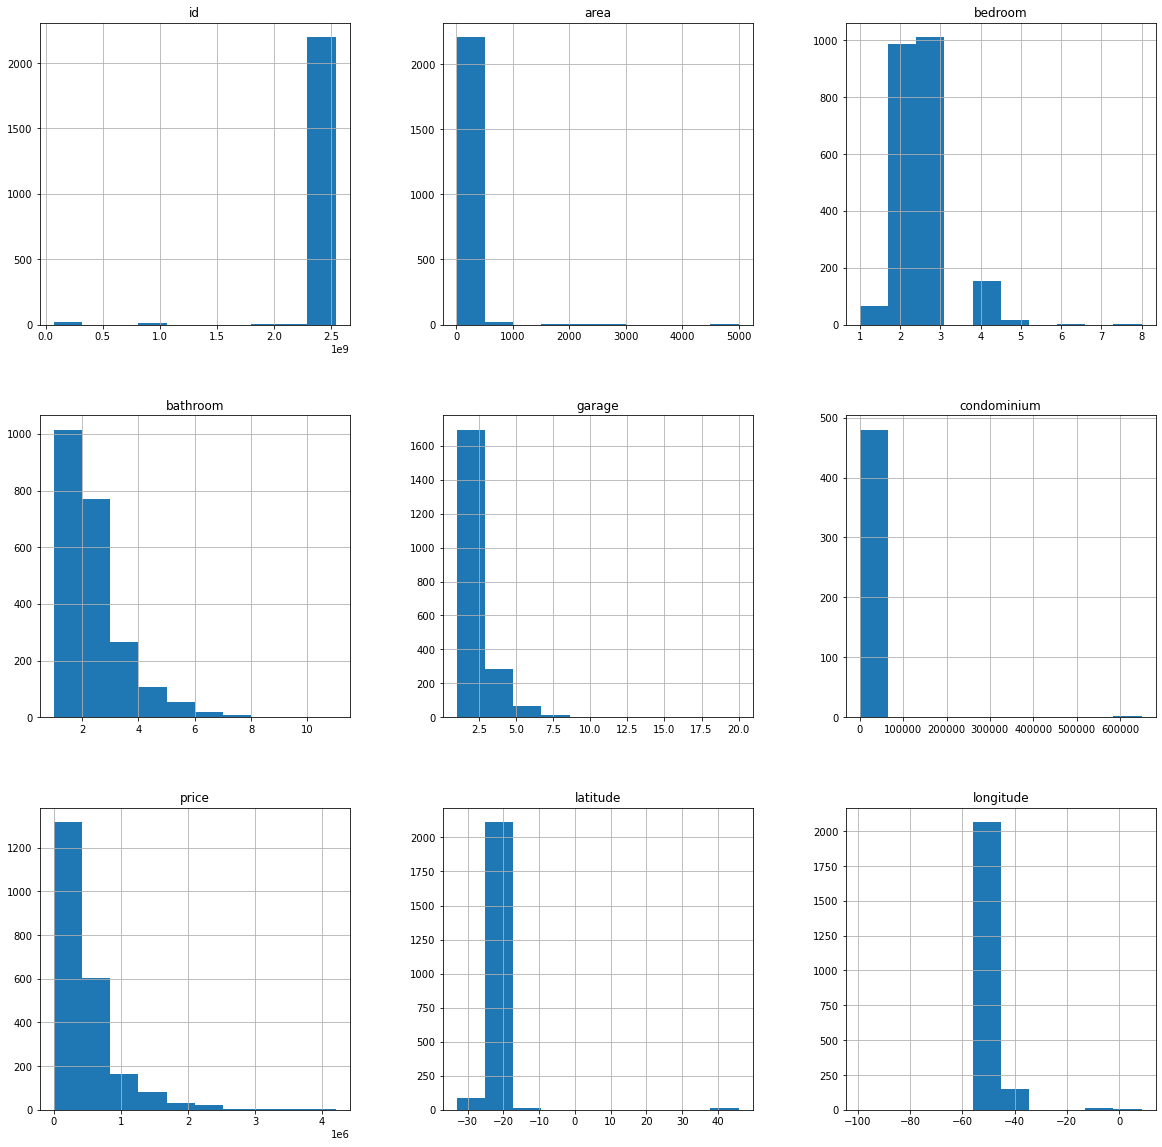

<AxesSubplot:xlabel='garage', ylabel='Density'>

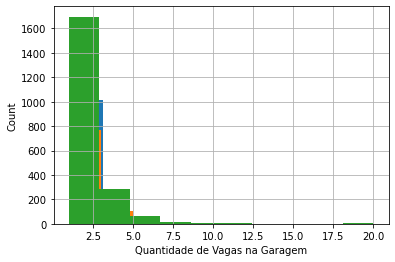

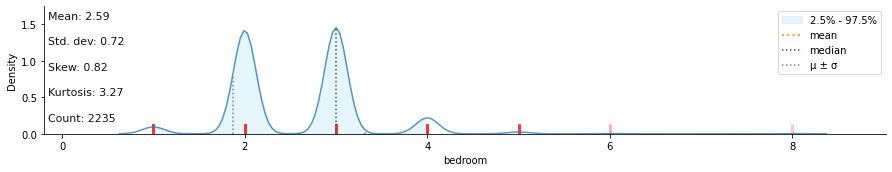

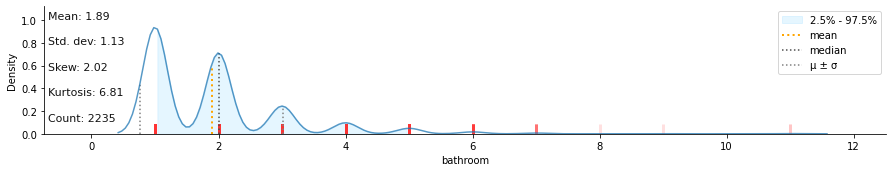

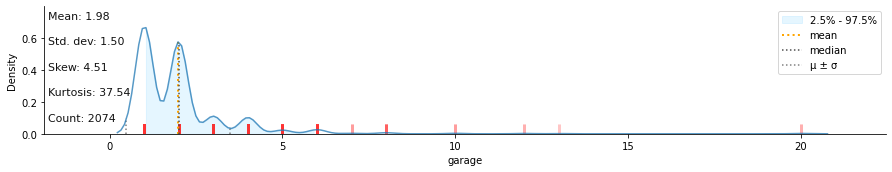

In [22]:
# Configurações relacionadas ao tamanho dos gráficos
fig = plt.figure(figsize = (20,20))
ax = fig.gca()

# Visualizando histogramas de todas as variáveis do dataframe
df_pocos.hist(ax=ax)
plt.show()

# Visualizando histogramas das variáveis (features) do dataframe
df_pocos['bedroom'].hist()
plt.xlabel('Quantidade de Quartos')
plt.ylabel('Count')

df_pocos['bathroom'].hist()
plt.xlabel('Quantidade de Banheiros')
plt.ylabel('Count')

df_pocos['garage'].hist()
plt.xlabel('Quantidade de Vagas na Garagem')
plt.ylabel('Count')

# Plotando os gráficos utilizando a biblioteca klib
klib.dist_plot(df_pocos['bedroom'])
klib.dist_plot(df_pocos['bathroom'])
klib.dist_plot(df_pocos['garage'])